<a href="https://colab.research.google.com/github/prashant1519/Assigment/blob/master/Terror.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

**Explore and analyze the data to discover key findings pertaining to terrorist activities.**


https://github.com/prashant1519

Questions from the Global Terrorism Database

1. What are the most regions which were attacked?
2. Which country had the highest number of terrorist attacks around the world . from 1970 through 2017?
3. What were the attack types adopted by the terrorists to spread terrorism?
4. What were the things which were targetted the most?
5. On which year the attacks were the most and which year attacks were the least?
6. Attacks in each months?
7. Which types of weapons were used by the terrorists most?
8. Which were the top leading gangs?

Description of the dataset

The data consist of one csv file which contains all the details of the terrorist attacks which occured between 1970 to 2017.

Our dataset contains many columns from which we will take only the one's which are needed to clear the problem statement.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load Dataset
file_p=("/content/drive/MyDrive/terrorism/Global Terrorism Data.csv")
terrorism_df = pd.read_csv(file_p, encoding = 'ISO-8859-1')

In [3]:
# checking head
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# Dataset Columns count
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
for i in terrorism_df.columns:
  print(i, end = ', ')

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [8]:
# Dataset Info
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
# Dataset Describe
terrorism_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Dataset Duplicated
terrorism_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690    False
Length: 181691, dtype: bool

In [11]:
#Checking for Missing values
terrorism_df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

**Cleaning Data**

In [12]:
#Renaming the columns to appropriate names
terrorism_df = terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                                            'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                                            'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [13]:
# Selecting the columns which are needed
terrorism_df = terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [14]:
#Checking for null values
terrorism_df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                435
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
dtype: int64

In [16]:
#Filling the nan values in state column as unknown
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [17]:
#Filling the nan values in city column as unknown
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [18]:
#Filling the nan values in Target_subtype column as others
terrorism_df['Target_subtype']=terrorism_df['Target_subtype'].fillna('Others')

In [19]:
# checking null values
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

# Unique Values

In [20]:
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [21]:
terrorism_df.columns.nunique()

12

In [22]:
total_countries = terrorism_df['Country'].nunique()
total_countries

205

In [23]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [24]:
print(terrorism_df['Region'].nunique())

12


In [25]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [26]:
print(terrorism_df['Attack_type'].nunique())

9


In [27]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [28]:
print(terrorism_df['Target_type'].nunique())

22


In [29]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']


In [30]:
print(terrorism_df['Weapon_type'].nunique())

12


In [31]:
print(terrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [32]:
print(terrorism_df['Gang_name'].nunique())

3537


In [33]:
terrorism_df['Region'].value_counts().head(10)

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: count, dtype: int64

**These were the top 10 affected regions.**

In [34]:
terrorism_df['Region'].value_counts().head(10)

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: count, dtype: int64

**These were the top 10 affected countries.**

In [35]:
terrorism_df['Country'].value_counts().head(10)

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

**These were the top 10 affected States.**

In [36]:
terrorism_df['State'].value_counts().head(10)

State
Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: count, dtype: int64

**These were the top 10 affected cities.**

In [37]:
terrorism_df['City'].value_counts().head(10)

City
Unknown         10210
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
Belfast          2171
Santiago         1621
Mogadishu        1581
San Salvador     1558
Istanbul         1048
Name: count, dtype: int64

**These were the top 10 attacking modes.**

In [38]:
terrorism_df['Attack_type'].value_counts().head(10)

Attack_type
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

**These were the top 10 targets to attack.**

In [39]:
terrorism_df['Target_type'].value_counts().head(10)

Target_type
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: count, dtype: int64

In [40]:
terrorism_df['Target_subtype'].value_counts().head(10)

Target_subtype
Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Others                                                     10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: count, dtype: int64

**These were the top most chosen Weapon types.**

In [41]:
terrorism_df['Weapon_type'].value_counts().head(10)

Weapon_type
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: count, dtype: int64

**These were the top 10 leading gangs.**

In [42]:
terrorism_df['Gang_name'].value_counts().head(10)

Gang_name
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: count, dtype: int64

**Visualization**

****

1. What are the most regions which were attacked?

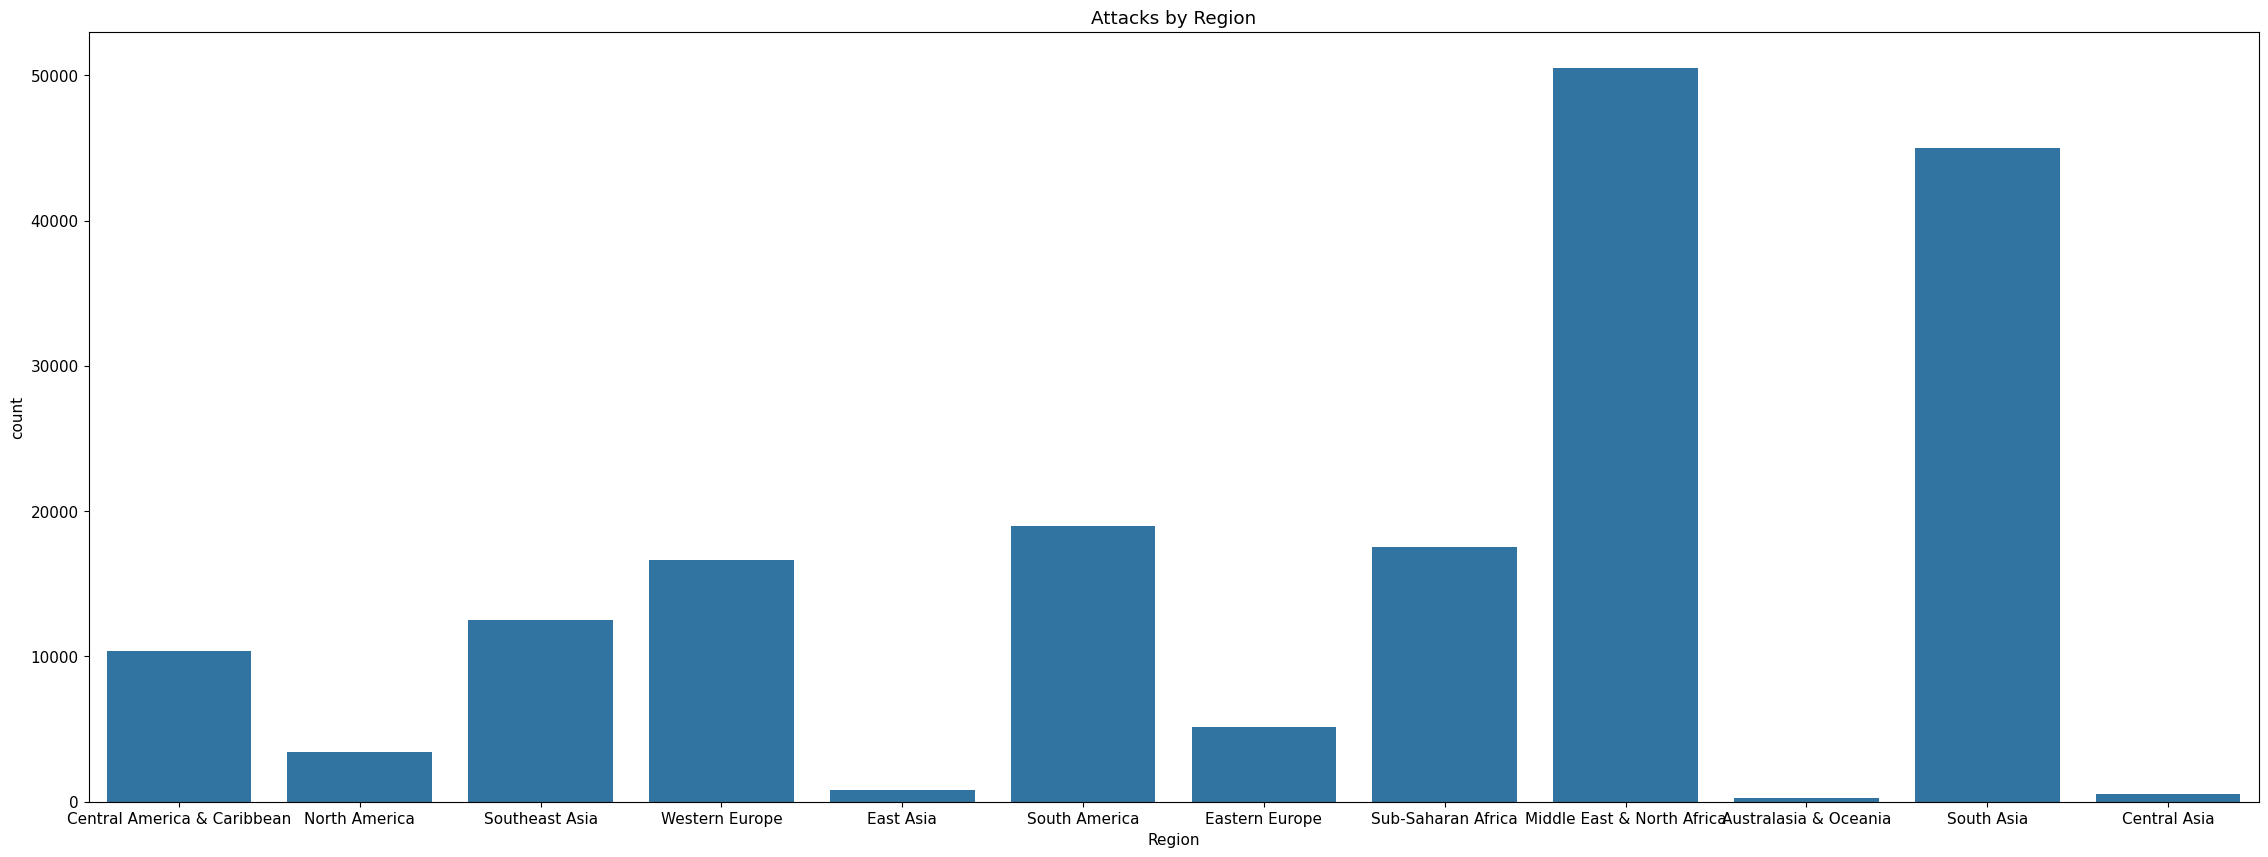

In [43]:
plt.figure(figsize=(28,10));
plt.rcParams.update({'font.size':11});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(x=terrorism_df.Region);
plt.style.use("dark_background")

2. Which country had the highest number of terrorist attacks around the world . from 1970 through 2017?

In [44]:
terrorism_df.Country.value_counts()[:15]

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: count, dtype: int64

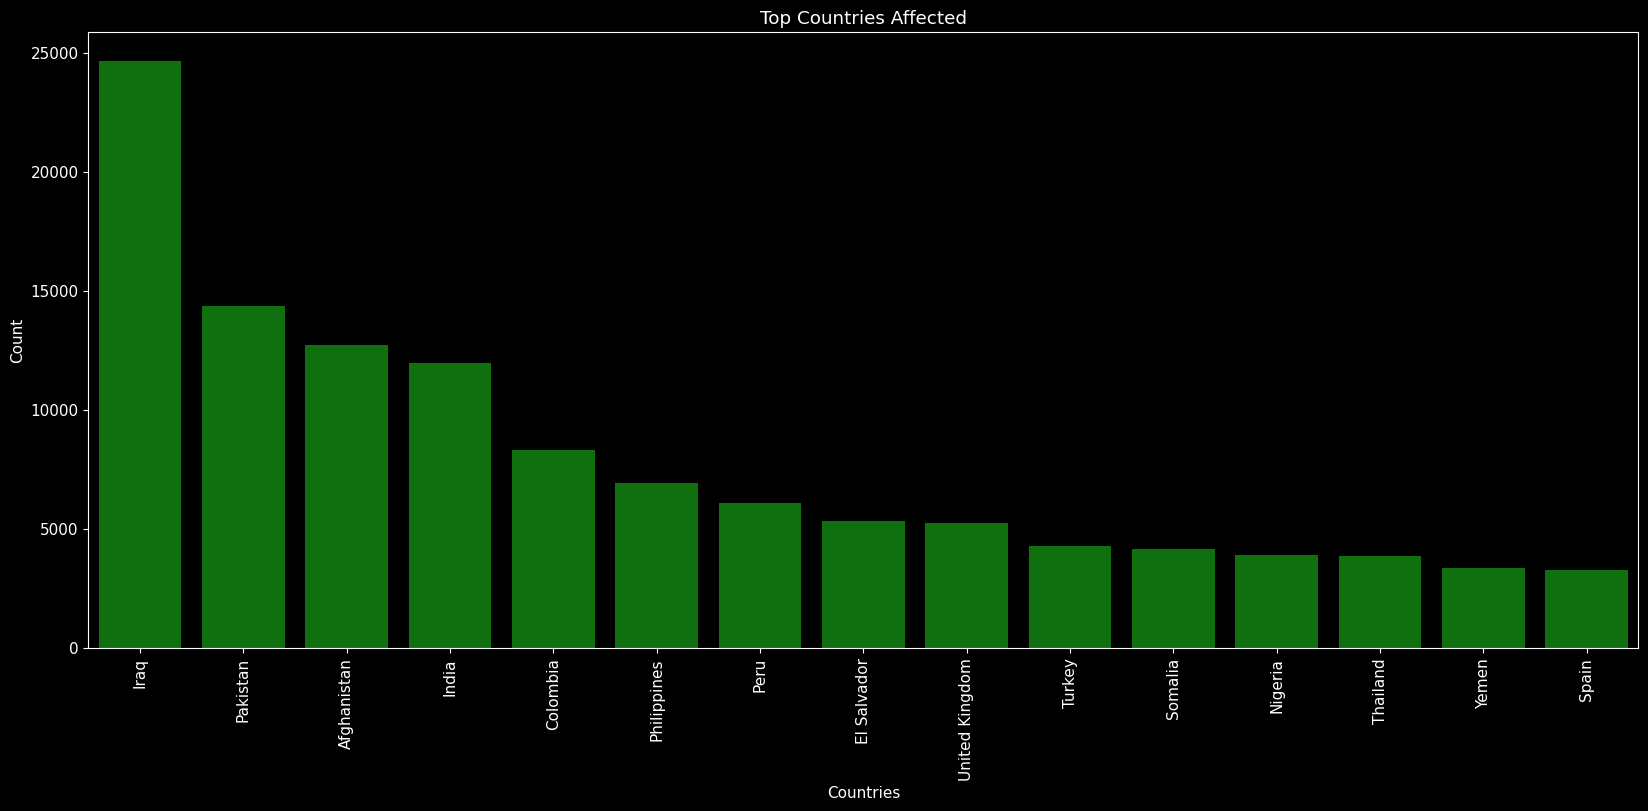

In [47]:
plt.subplots(figsize=(20,8))
sns.barplot(x=terrorism_df['Country'].value_counts()[:15].index,y=terrorism_df['Country'].value_counts()[:15].values,color = 'green')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

3. What were the attack types adopted by the terrorists to spread terrorism?

Text(0.5, 1.0, 'Based on Attack type')

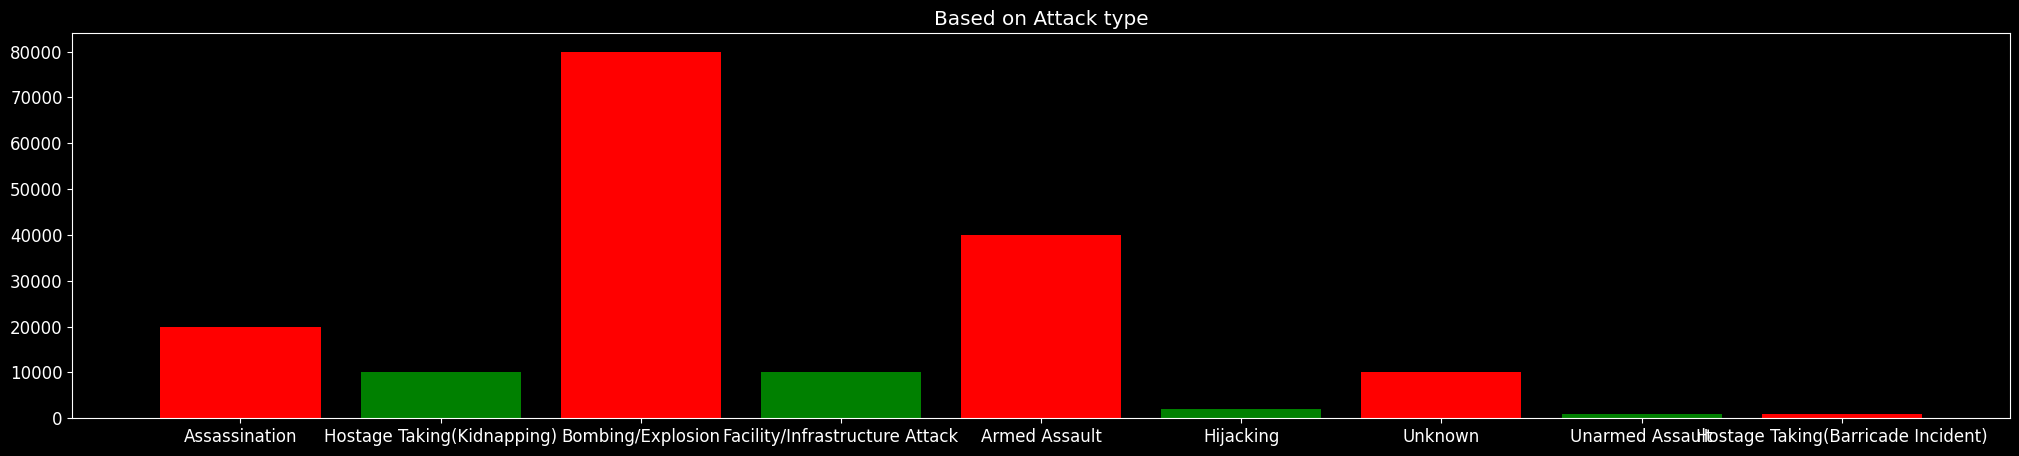

In [48]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
x= ['Assassination', 'Hostage Taking(Kidnapping)', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault', 'Hostage Taking(Barricade Incident)']
h = [20000, 10000, 80000, 10000, 40000, 2000, 10000, 1000, 1000]
c = ['Red', 'Green', 'Red', 'Green','Red', 'Green', 'Red', 'Green', 'Red']
plt.bar(x, height = h, color = c)
plt.xticks(rotation = 0)
plt.title('Based on Attack type')

4. What were the things which were targetted the most?

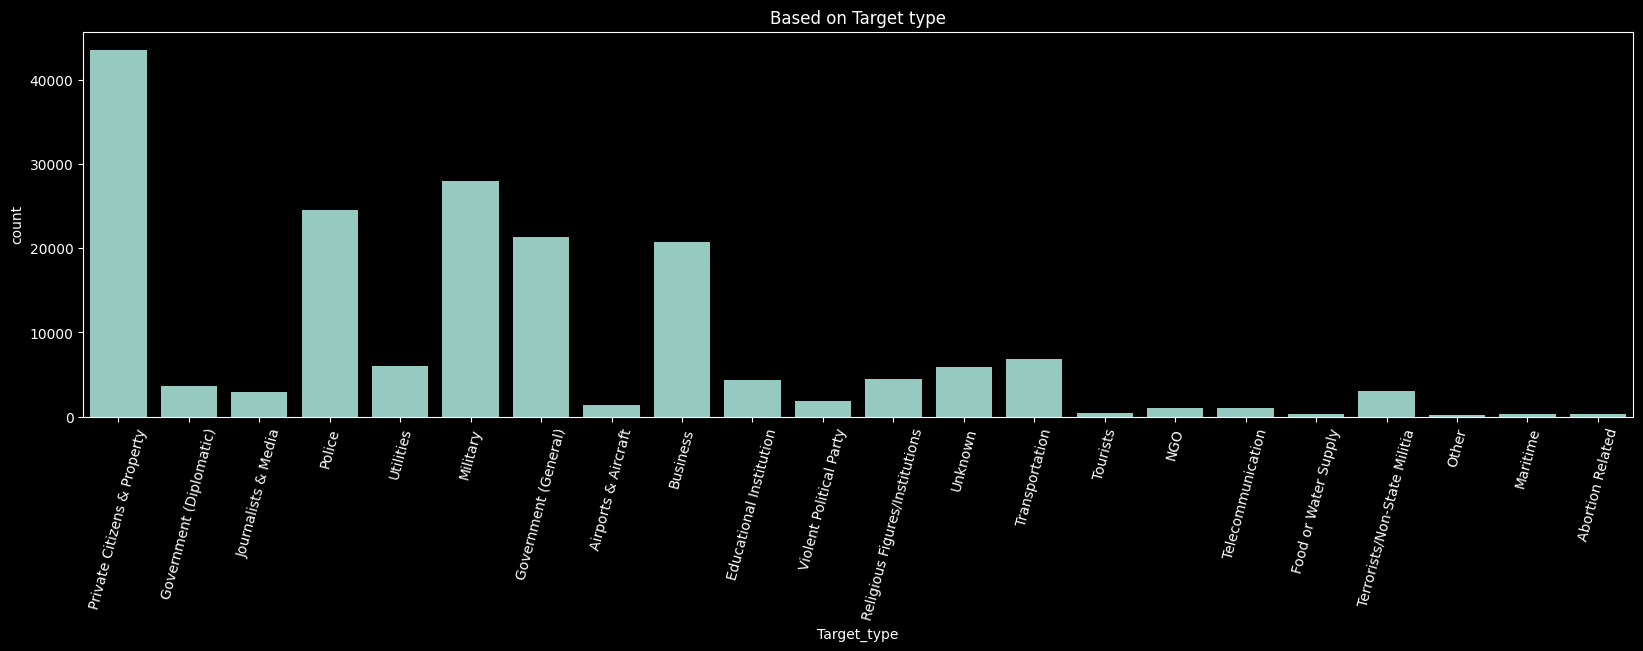

In [49]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 75)
plt.title('Based on Target type')
sns.countplot(x=terrorism_df.Target_type);

5. On which year the attacks were the most and which year attacks were the least?

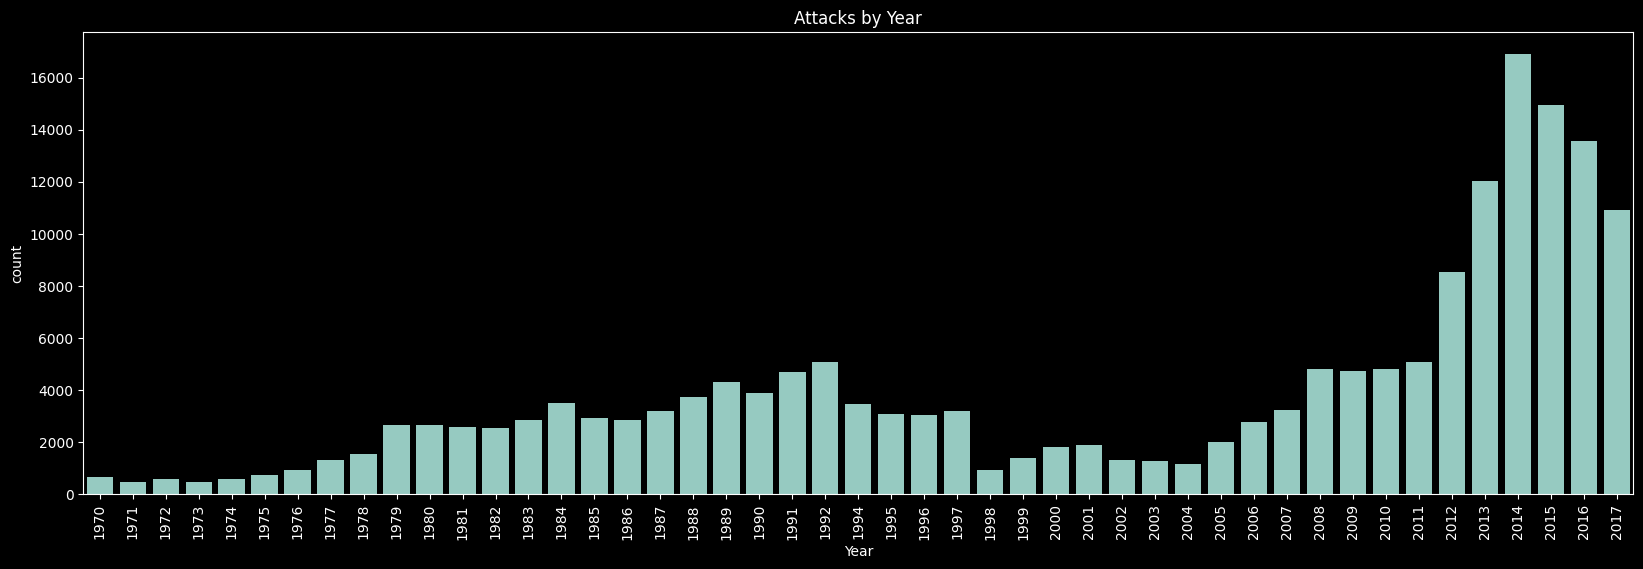

In [50]:
plt.figure(figsize=(20,6));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=terrorism_df.Year);

6. Attacks in each months?

Text(0.5, 1.0, 'Attacks by Months')

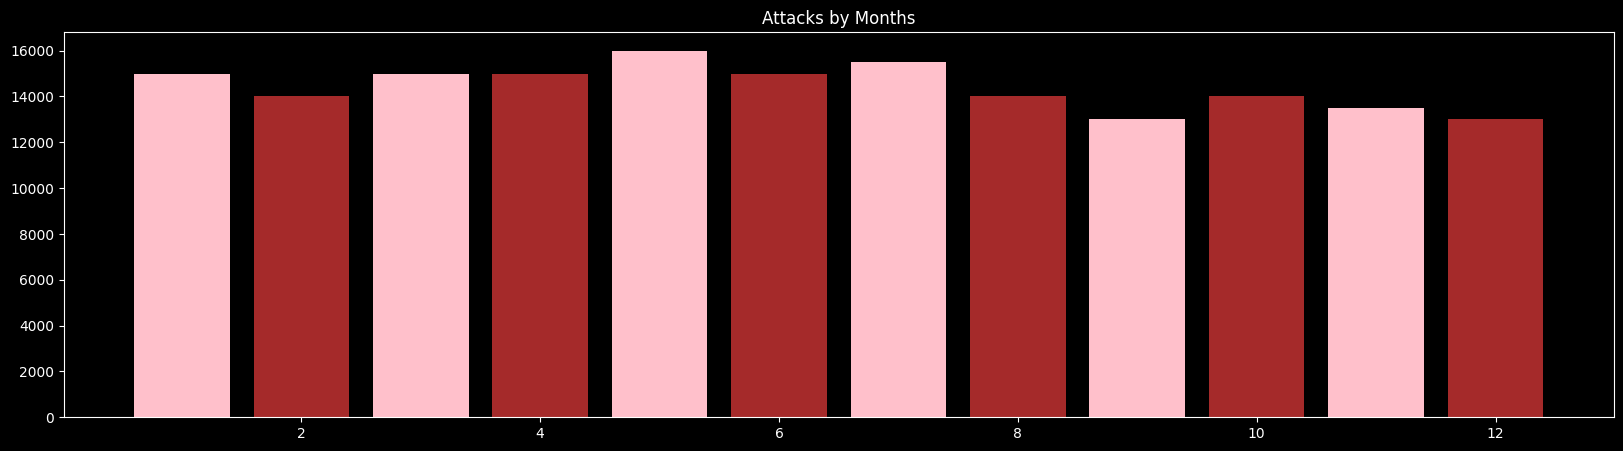

In [52]:
plt.figure(figsize=(20,5));
x= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
h = [15000, 14000, 15000, 15000, 16000, 15000, 15500, 14000, 13000, 14000, 13500, 13000]
c = ['pink','brown','pink','brown','pink','brown','pink','brown','pink','brown','pink','brown']
plt.bar(x, height = h, color = c)
plt.title('Attacks by Months')

7. Which types of weapons were used by the terrorists most?

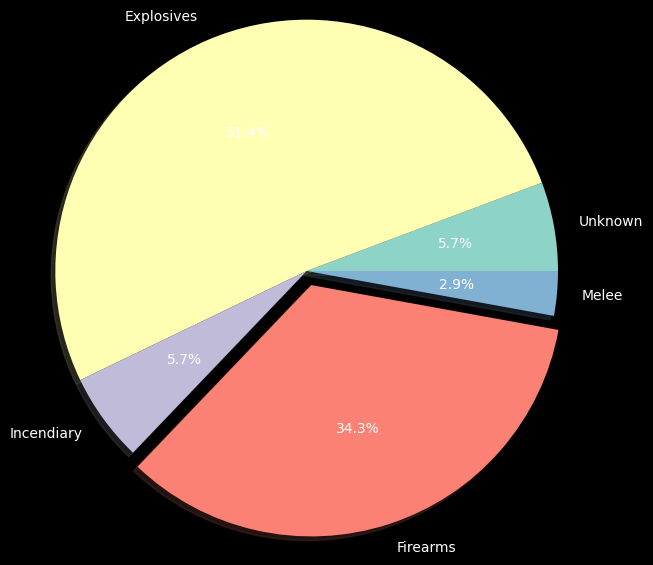

In [53]:
weapons = terrorism_df['Weapon_type'].value_counts()[0:6]
weapons_no = [10000, 90000, 10000, 60000, 5000]
weapons_labels = ['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Melee' ]
plt.axis('equal')
plt.pie(weapons_no,labels=weapons_labels, radius = 1.7, autopct = '%0.1f%%' ,shadow = True, explode = [0,0,0,0.1,0])
plt.show()

8. Which were the top leading gangs?

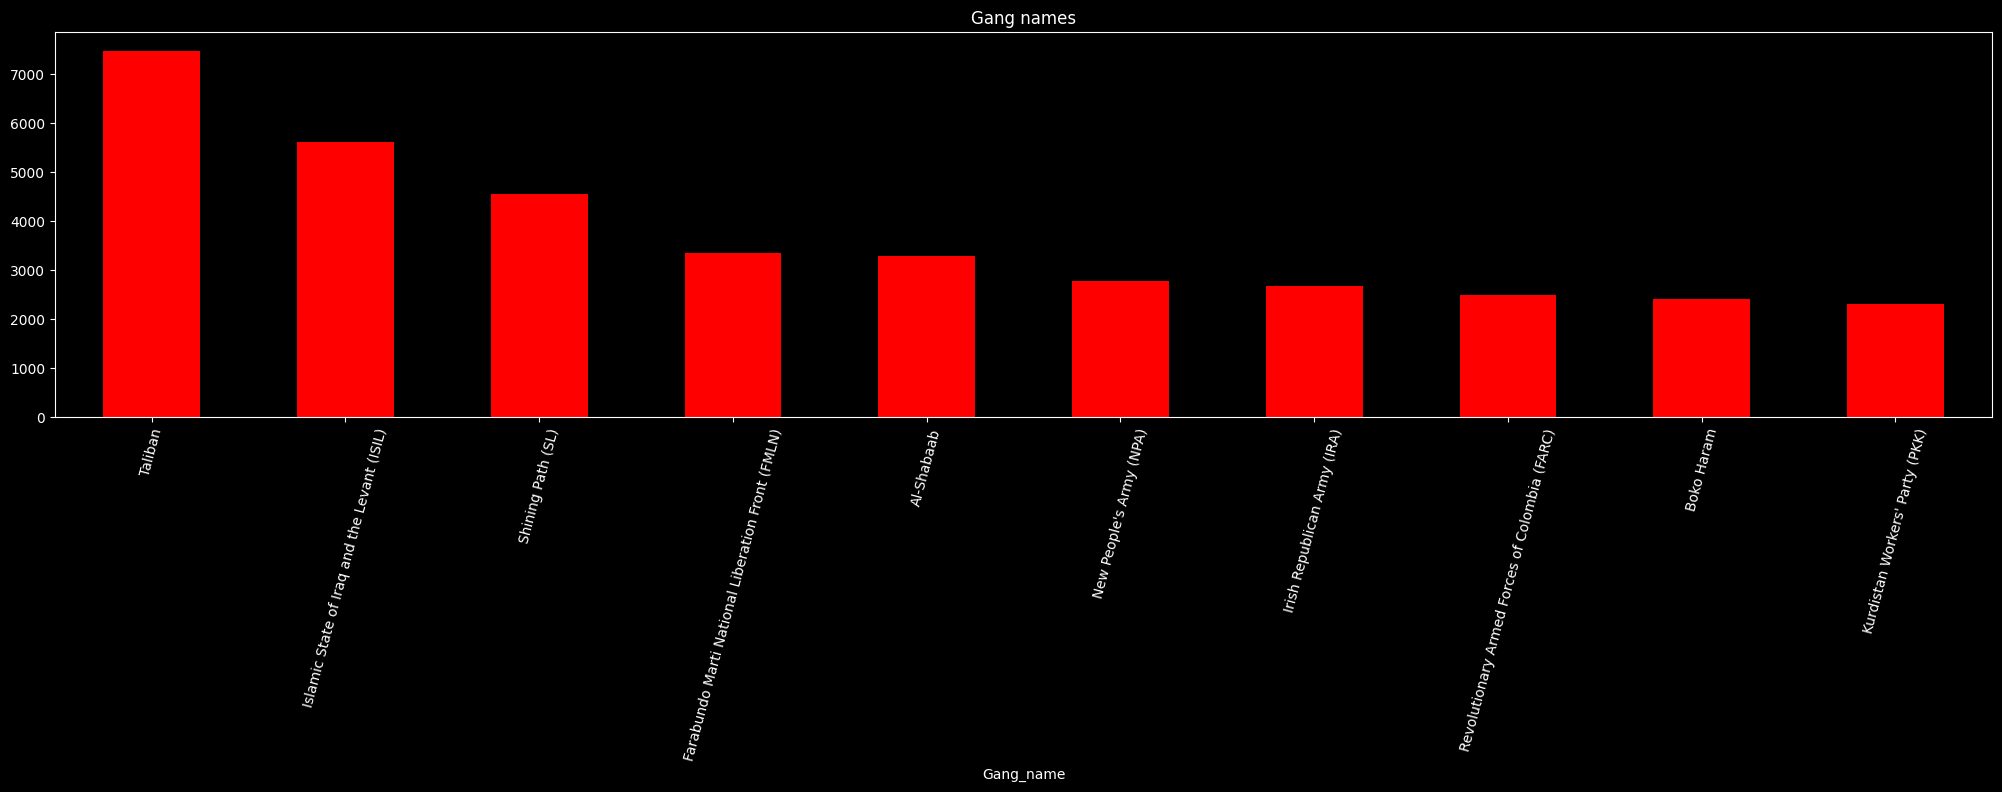

In [54]:
Gang = terrorism_df['Gang_name'].value_counts()[1:11]
Gang.plot(kind='bar',color='red', figsize=(25,5))
plt.xticks(rotation = 75)
plt.title("Gang names")
plt.show()

9. Countries That suffer the most due to these Attacks.

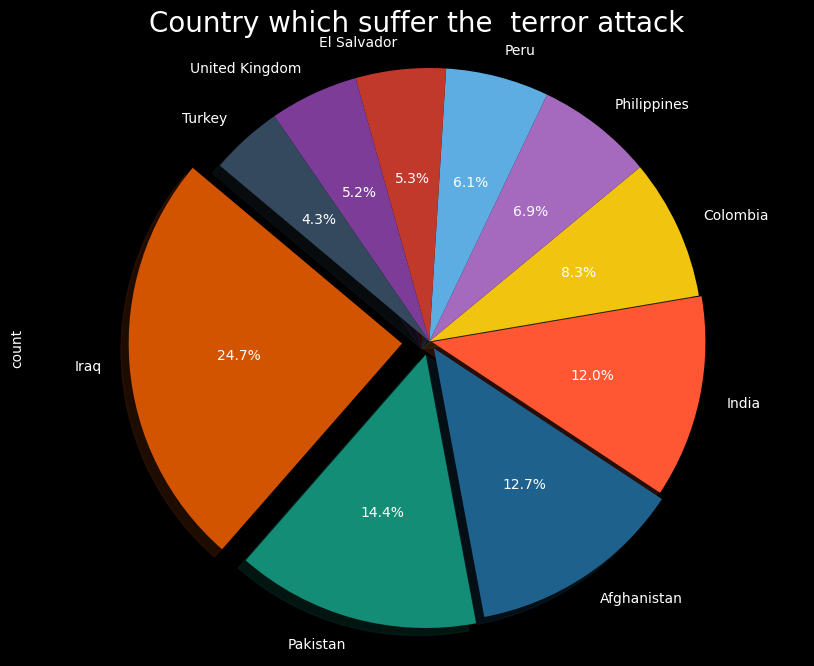

In [55]:
plt.figure(figsize=(10, 8))
explode = (0.1, 0.05, 0.03, 0.01, 0, 0, 0, 0, 0, 0)
color = ['#34495E', '#7D3C98', '#C0392B', '#5DADE2', '#A569BD', '#F1C40F', '#FF5733', '#1F618D', '#138D75', '#D35400']
colors=color[::-1]
terrorism_df['Country'].value_counts().head(10).plot.pie(autopct='%1.1f%%',colors=colors,shadow=True,explode=explode,startangle=140)
plt.axis('equal')
plt.title('Country which suffer the  terror attack',fontsize=20)

plt.show()